# Assignment 1: Naive Bayes classification {-}

This assignment aims at familiarizing you with training and testing Naive Bayes model. You will have to:

- Load the dataset.
- Analyze the dataset.
- Split the dataset into training, validation and test set.
- Train a Gaussian Naive Bayes (GaussianNB, https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) model and find the best set of hyperparameters (var_smoothing hyperparameter) using validation set and cross validation technique (see GridSearchCV )
- Train a Mixed Naive Bayes (MixedNB, https://pypi.org/project/mixed-naive-bayes/) model.
- Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.

The dataset you will be working on is 'travel-insurance.csv'. It is composed of attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment1 (e.g., ML4DS-2012345-Assigment1) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training and testing purpose, build a Naive Bayes classifier and evaluate the model performance. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("travel-insurance.csv", index_col=0)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

In [3]:
# You code goes here

In [4]:
#Summary the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [5]:
#Check for Nan value. Found none, good to go.
df.isnull().any()

Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

In [6]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()
df['GraduateOrNot'] = label_encode.fit_transform(df['GraduateOrNot'])
df['FrequentFlyer'] = label_encode.fit_transform(df['FrequentFlyer'])
df['EverTravelledAbroad'] = label_encode.fit_transform(df['EverTravelledAbroad'])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,1,1500000,4,0,1,1,1
1983,28,Private Sector/Self Employed,1,1750000,5,1,0,1,0
1984,28,Private Sector/Self Employed,1,1150000,6,1,0,0,0
1985,34,Private Sector/Self Employed,1,1000000,6,0,1,1,1


In [7]:
employment_type = pd.get_dummies(df['Employment Type'], dtype = np.uint8)
df_cp = pd.concat([df, employment_type], axis=1)
df_cp.drop('Employment Type', inplace=True, axis=1)
df_cp

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Government Sector,Private Sector/Self Employed
0,31,1,400000,6,1,0,0,0,1,0
1,31,1,1250000,7,0,0,0,0,0,1
2,34,1,500000,4,1,0,0,1,0,1
3,28,1,700000,3,1,0,0,0,0,1
4,28,1,700000,8,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1982,33,1,1500000,4,0,1,1,1,0,1
1983,28,1,1750000,5,1,0,1,0,0,1
1984,28,1,1150000,6,1,0,0,0,0,1
1985,34,1,1000000,6,0,1,1,1,0,1


<Axes: >

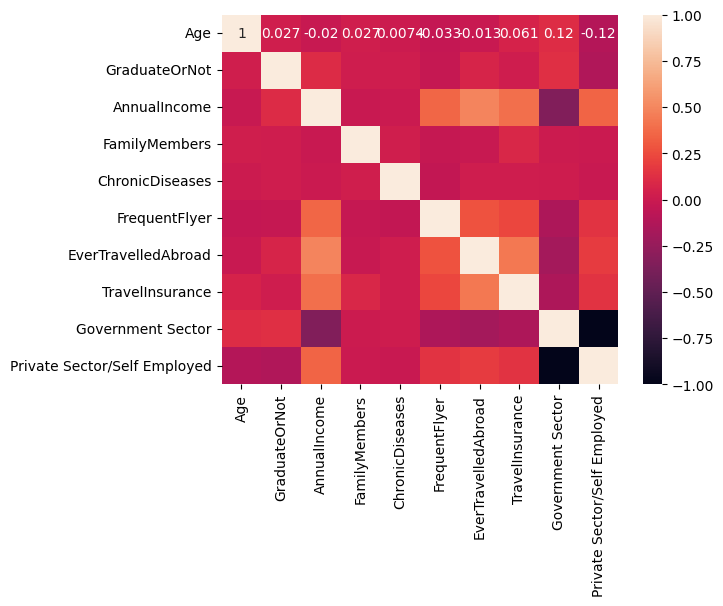

In [8]:
corr = df_cp.corr()
# plot the heatmap 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

## Gaussian Bayes

In [9]:
feature_names = df_cp.columns.tolist()     # Get the list of data features from column names
feature_names.remove("TravelInsurance")
feature_names.remove("EverTravelledAbroad")
X = df_cp[feature_names].values            # Assign data feature values to variable X

y = df_cp.TravelInsurance.values                 # Assign data label values to variable y

In [10]:
feature_names

['Age',
 'GraduateOrNot',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'FrequentFlyer',
 'Government Sector',
 'Private Sector/Self Employed']

In [11]:
print(f'X shape: {X.shape}')
print(f'Y shape: {y.shape}')

X shape: (1987, 8)
Y shape: (1987,)


In [12]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)     # Note that we use fit_transform() on training data so that it can learn the scaling parameters of that data.
X_normal_test = normalizer.transform(X_test)           # But we only transform() in test data using the learned scaling parameters.

In [14]:
# Initialize and train Gaussian Naive Bayes model using X_normal_train (data features) and y_train (data label)
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_normal_train, y_train)

GaussianNB()

In [15]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
predicted_label = naive_model.predict(X_normal_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.5841121495327103
0.6377551020408163
0.6097560975609756
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       401
           1       0.58      0.64      0.61       196

    accuracy                           0.73       597
   macro avg       0.70      0.71      0.70       597
weighted avg       0.74      0.73      0.73       597



### Cross-validation using GridCV

In [16]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler, PowerTransformer
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)     # Note that we use fit_transform() on training data so that it can learn the scaling parameters of that data.
X_normal_test = normalizer.transform(X_test)           # But we only transform() the test data using the learned scaling parameters.

In [18]:
print(np.logspace(0,-9, num=10))
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=10, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
from sklearn.model_selection import GridSearchCV

gs_NB = GridSearchCV(estimator=naive_model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_normal_train)
Test_transformed = PowerTransformer().fit_transform(X_normal_test)

gs_NB.fit(Data_transformed, y_train);

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [24]:
print(f'Best parameter for smoothing {gs_NB.best_params_}')
print(f'Best score with the above parameter {gs_NB.best_score_}')

Best parameter for smoothing {'var_smoothing': 0.533669923120631}
Best score with the above parameter 0.7230215827338128


In [20]:
predict_test = gs_NB.predict(Test_transformed)

In [25]:
# Accuracy Score on test dataset
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7336683417085427


In [26]:
y_test.shape

(597,)

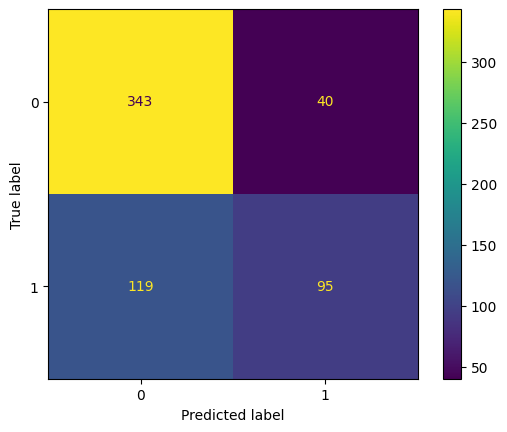

In [28]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test,predict_test)
cm_display = ConfusionMatrixDisplay(cm).plot()
# sns.heatmap((confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g').set_title('Test Data')

## Mixed-Bayes 

In [29]:
from mixed_naive_bayes import MixedNB

In [30]:
df_cp[feature_names]

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,Government Sector,Private Sector/Self Employed
0,31,1,400000,6,1,0,1,0
1,31,1,1250000,7,0,0,0,1
2,34,1,500000,4,1,0,0,1
3,28,1,700000,3,1,0,0,1
4,28,1,700000,8,1,1,0,1
...,...,...,...,...,...,...,...,...
1982,33,1,1500000,4,0,1,0,1
1983,28,1,1750000,5,1,0,0,1
1984,28,1,1150000,6,1,0,0,1
1985,34,1,1000000,6,0,1,0,1


In [35]:
df_cp['GraduateOrNot'].describe()

count    1987.000000
mean        0.851535
std         0.355650
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: GraduateOrNot, dtype: float64

In [38]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
clf = MixedNB(categorical_features=[1, 4, 5, 6, 7])
clf.fit(X_train, y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [43]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,